In [1]:
import icebergs
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
rect = icebergs.Rectangle(10, 20)
rect.display()

Polygon info:
Number of vertices: 4
Point2D vertex 1: x = 5.0, z = -10.0
Point2D vertex 2: x = 5.0, z = 10.0
Point2D vertex 3: x = -5.0, z = 10.0
Point2D vertex 4: x = -5.0, z = -10.0
Area: 200.0
Centroid: x = 0.0 , z = 0.0
Ix: 1666.6666666666667
Iy: 8333.333333333334
Iz: 6666.666666666667


In [3]:
def Iy_rectangle(H, eps, L=1.0, rho=1.0):
    return (1./12.) * H**4 * eps * (1. + eps**2) * rho

print(Iy_rectangle(20, 0.5))

8333.333333333332


In [4]:
@interact(x=(0, 10, 0.2), z=(-10, 0, 0.2), theta_deg=(0, 90, 1))
def plot_iceberg(x=0.0, z=0.0, theta_deg=10.0):
    theta = theta_deg * np.pi / 180
    berg = icebergs.Iceberg2D(rect, x=x, z=z, theta=theta)
    berg.plot_iceberg()

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, step=0.2), FloatSlider(value=0.0, desc…

In [5]:
timestep = 0.1
gamma_u = 0.5
gamma_w = 0.5
gamma_omega = 0.5
xwall = 0.0
restitution = 0.5

solver = icebergs.DynamicsSolver(timestep, gamma_u, gamma_w, gamma_omega, xwall, restitution)

In [6]:
theta_deg = 1.0
theta = theta_deg * np.pi / 180
berg = icebergs.Iceberg2D(rect, x=6, z=-8, theta=theta)

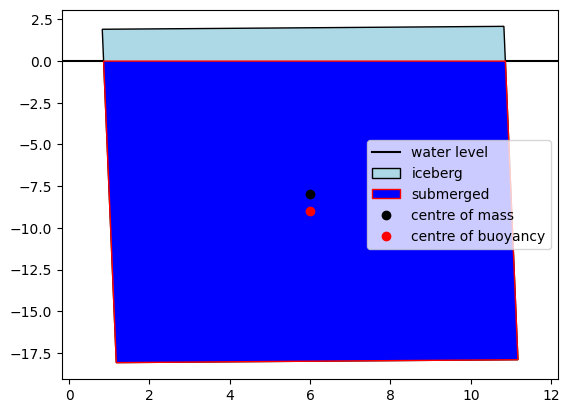

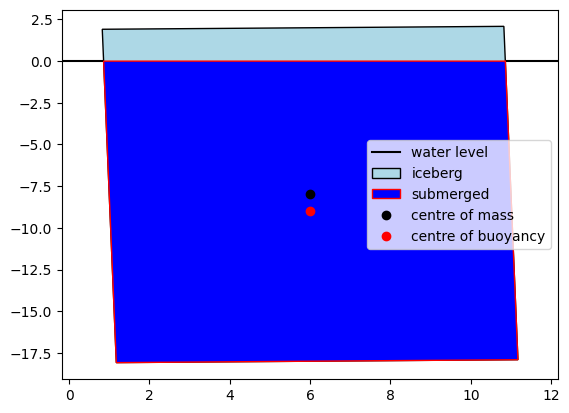

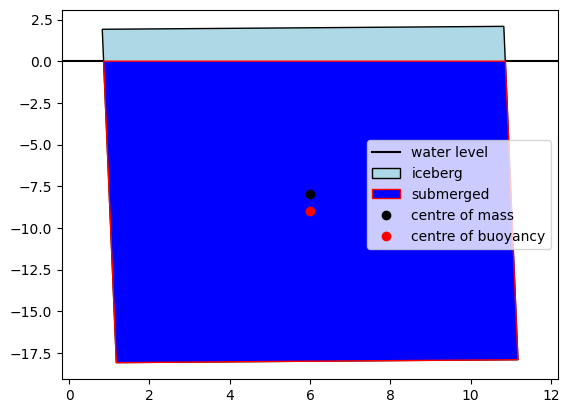

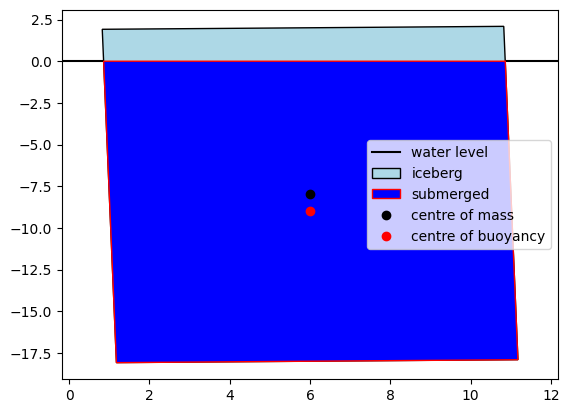

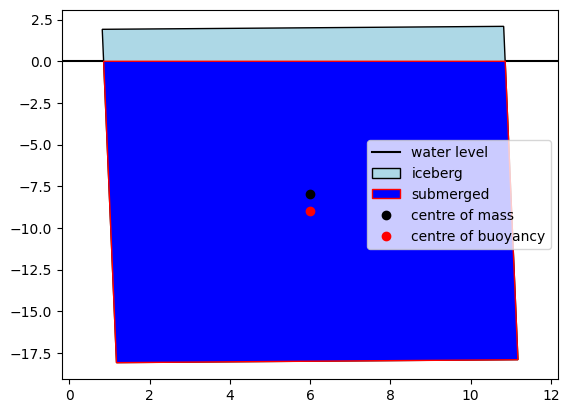

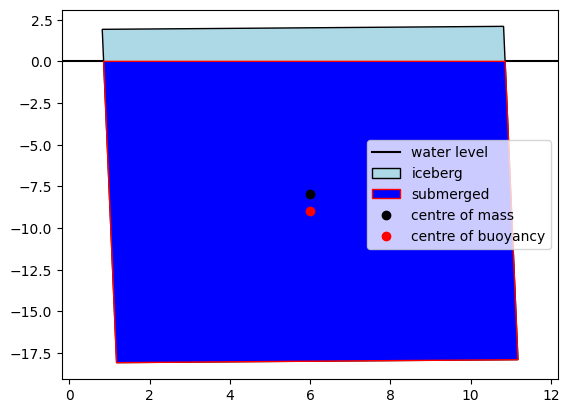

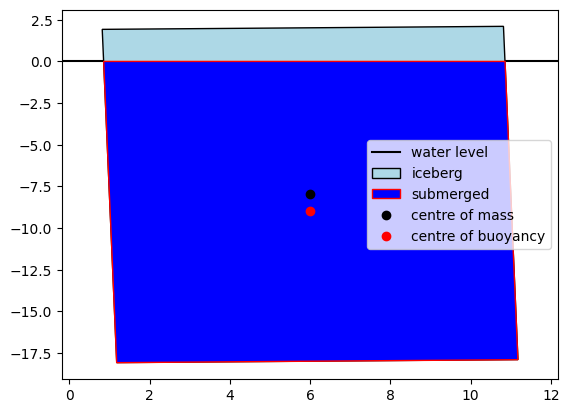

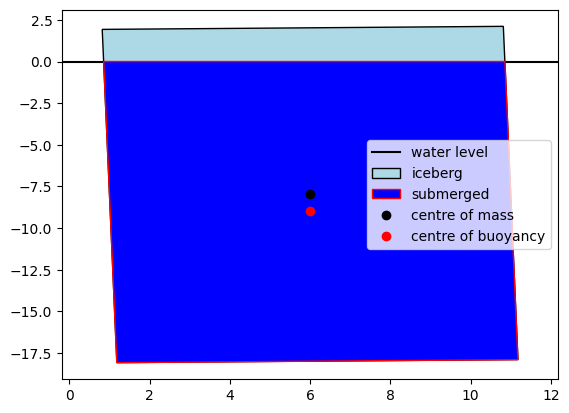

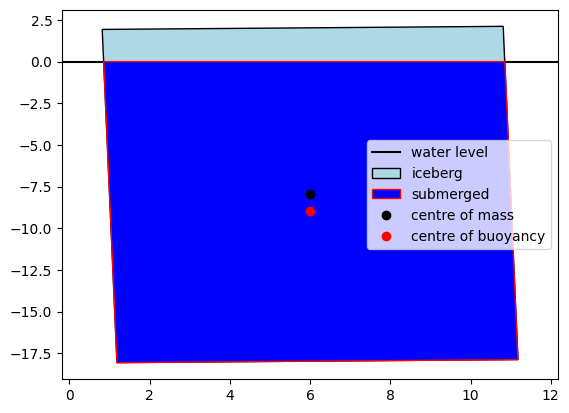

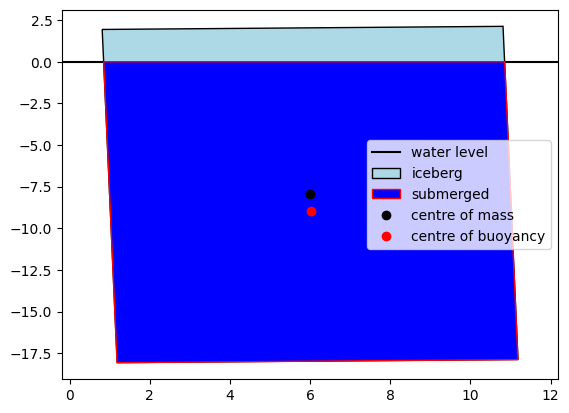

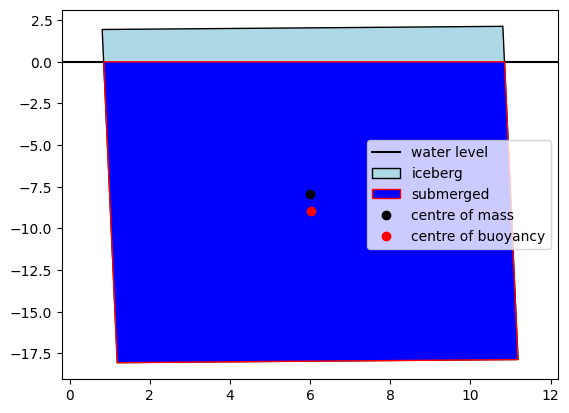

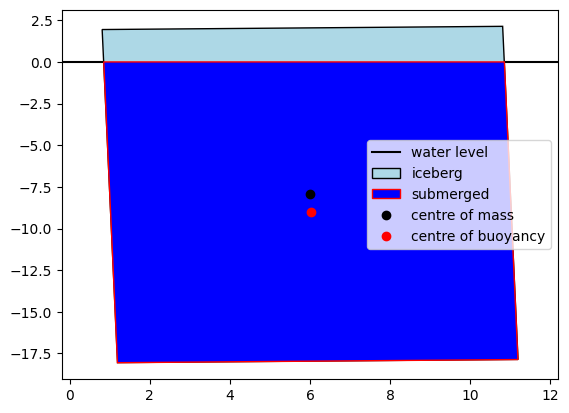

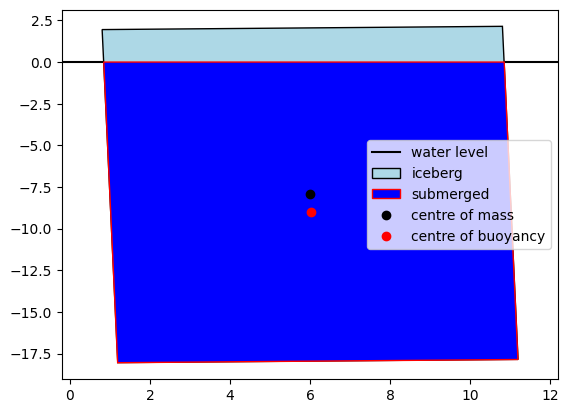

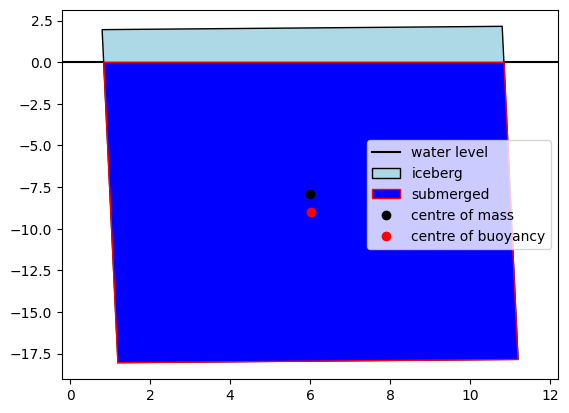

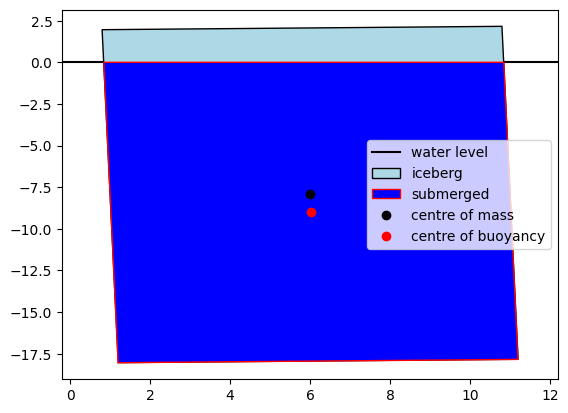

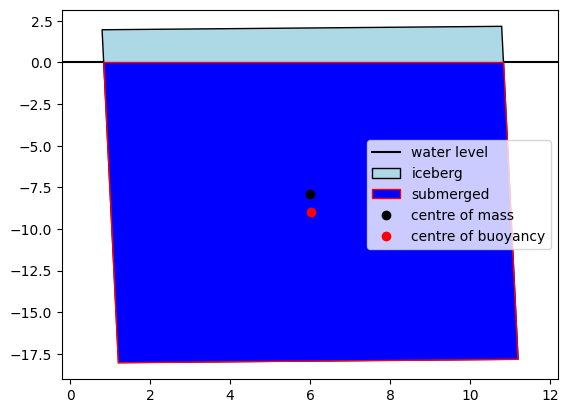

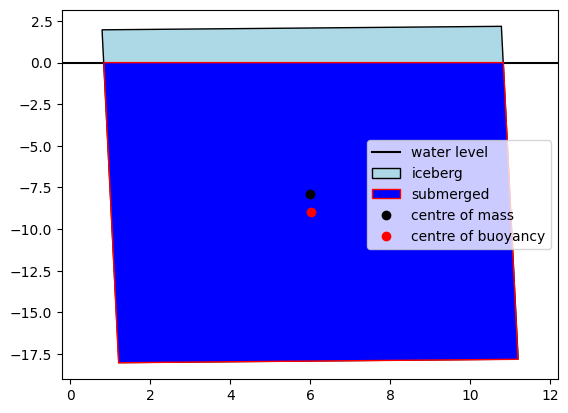

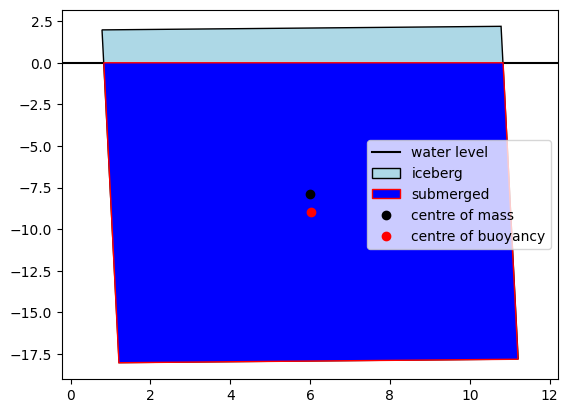

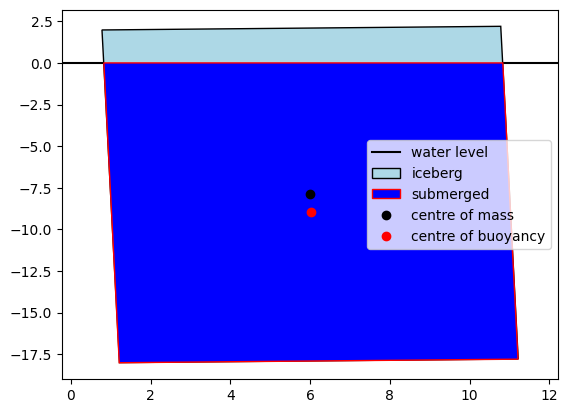

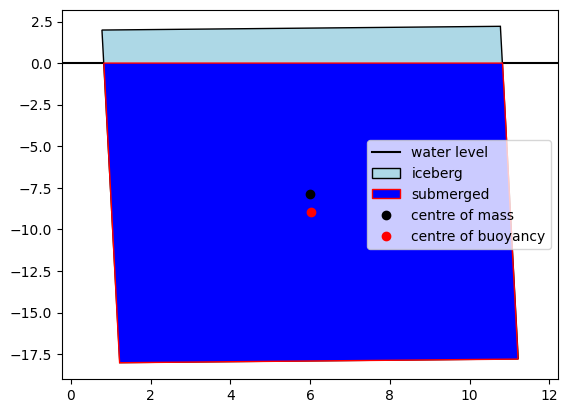

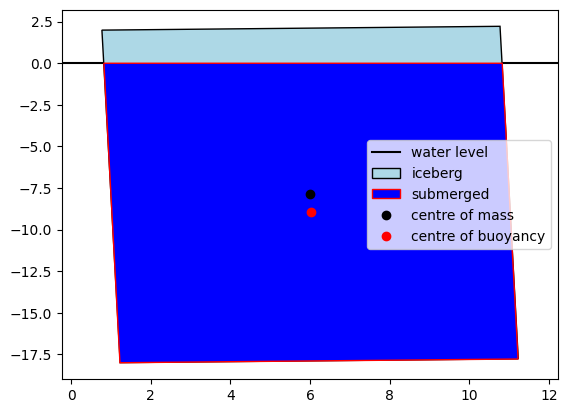

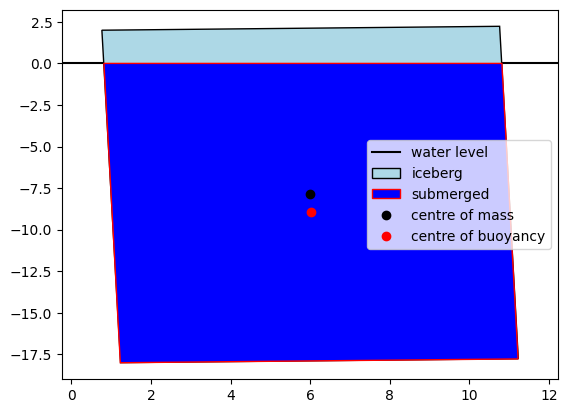

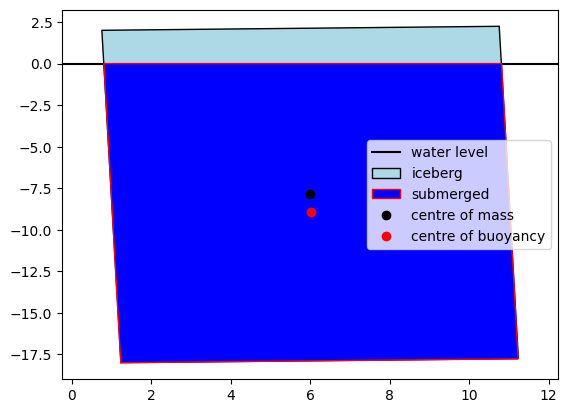

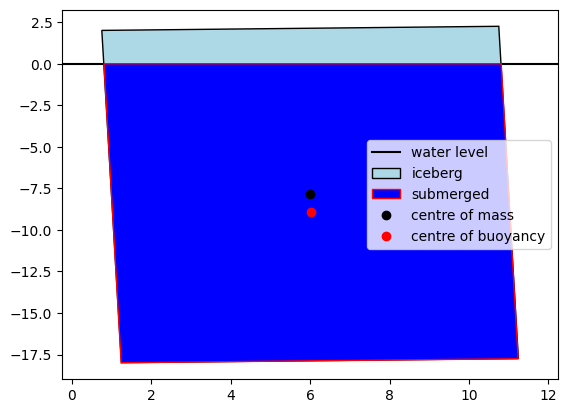

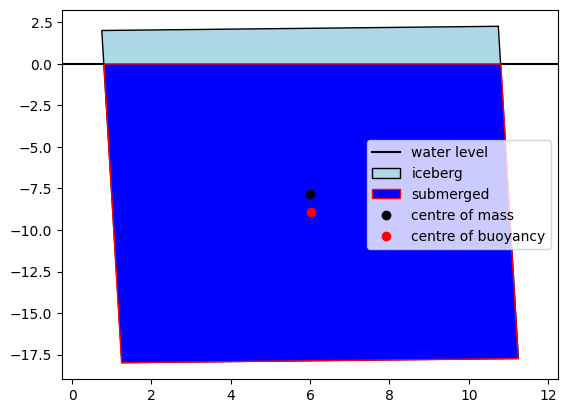

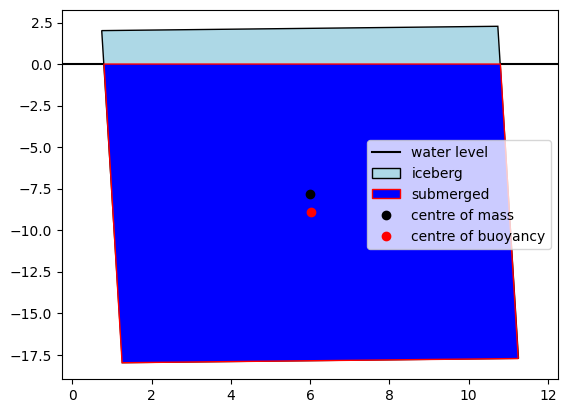

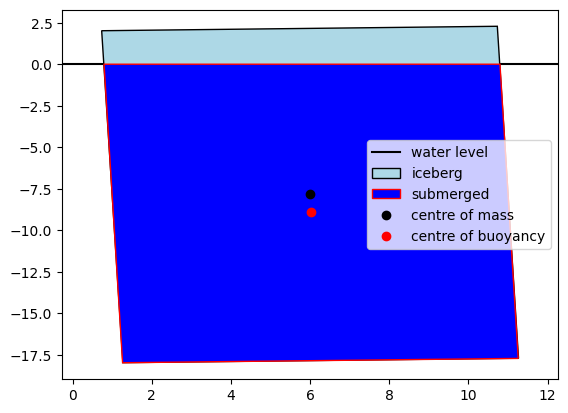

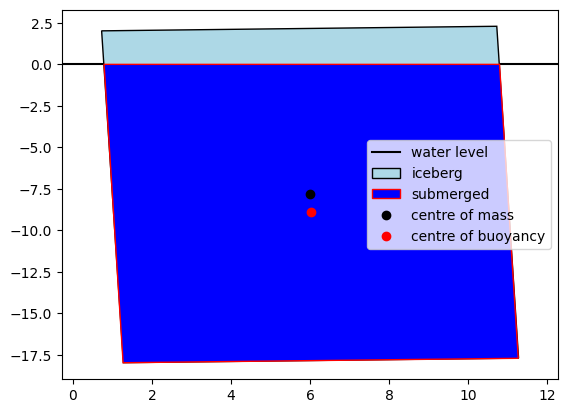

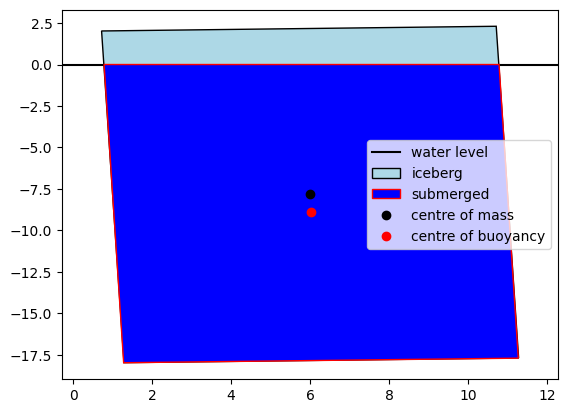

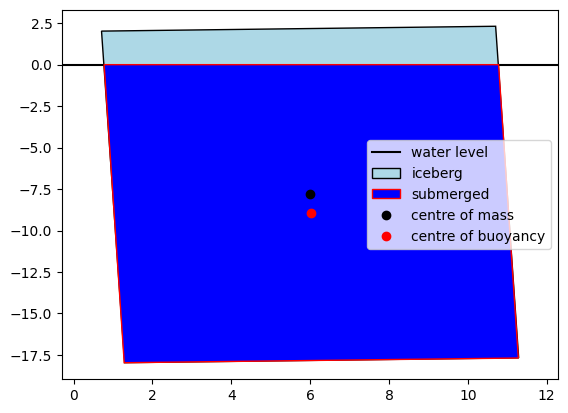

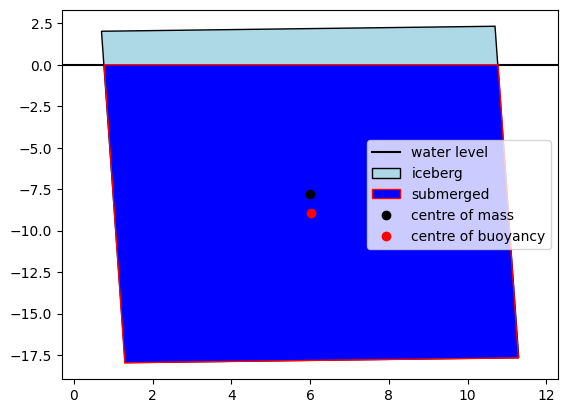

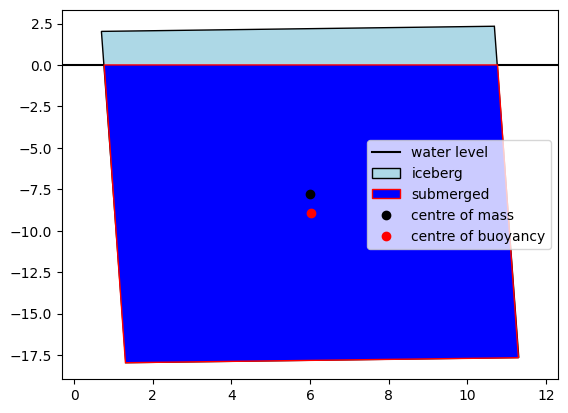

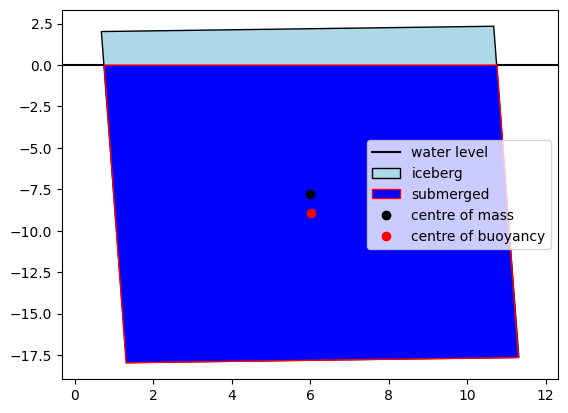

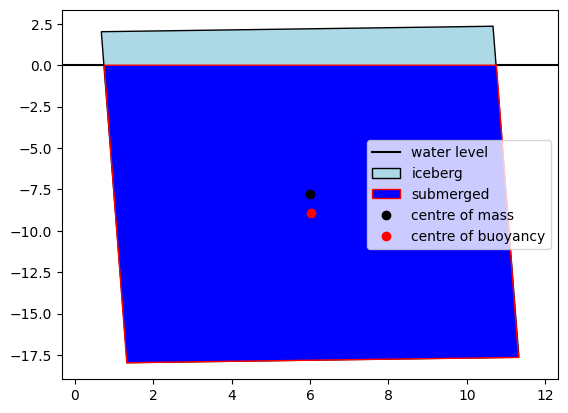

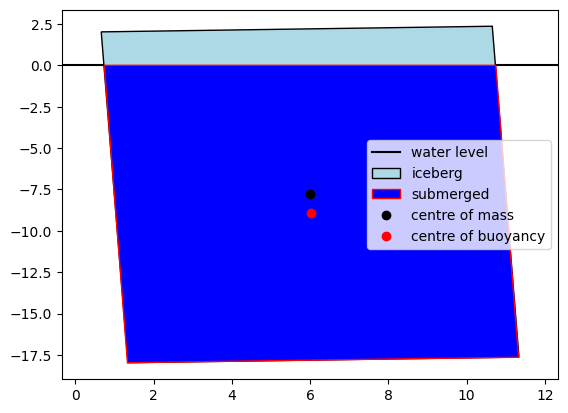

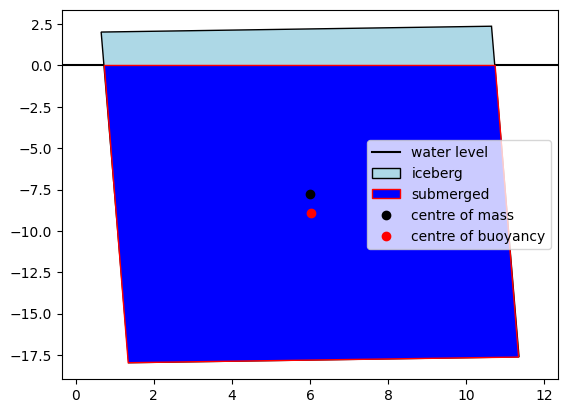

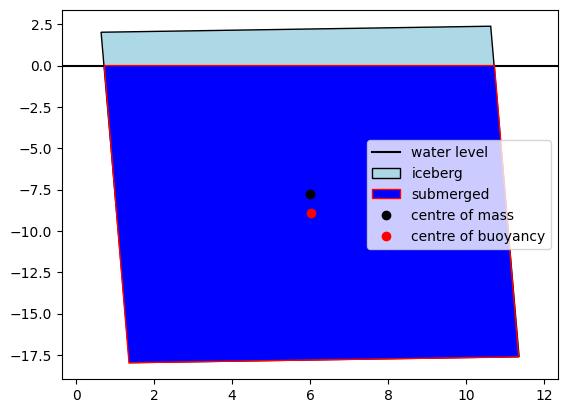

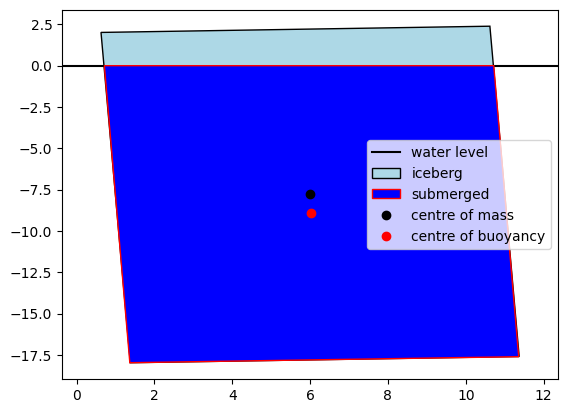

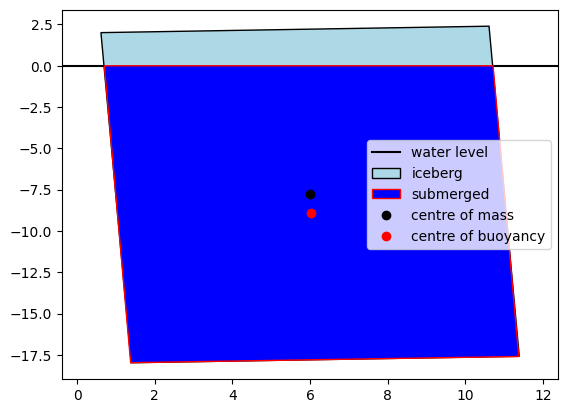

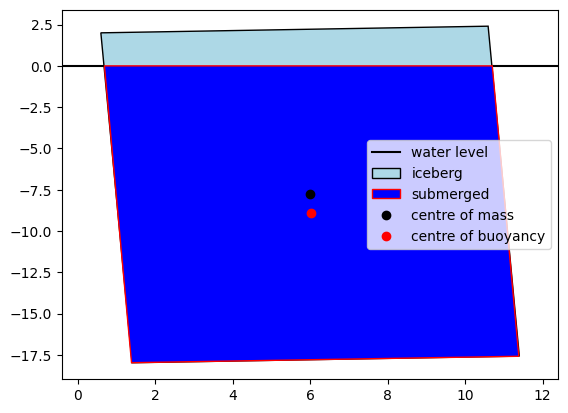

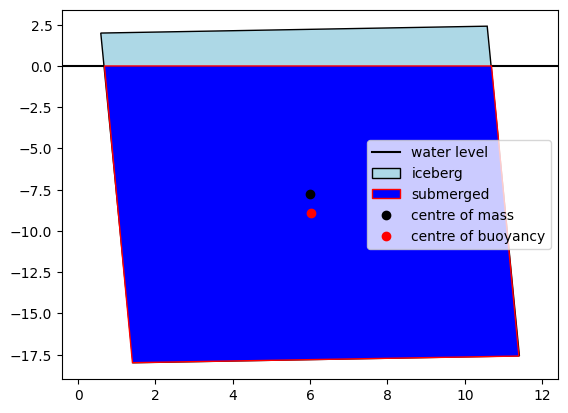

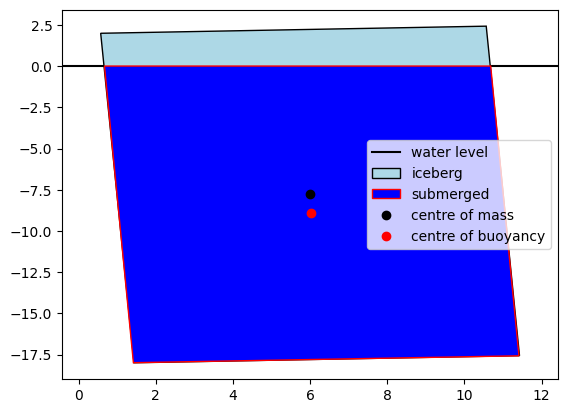

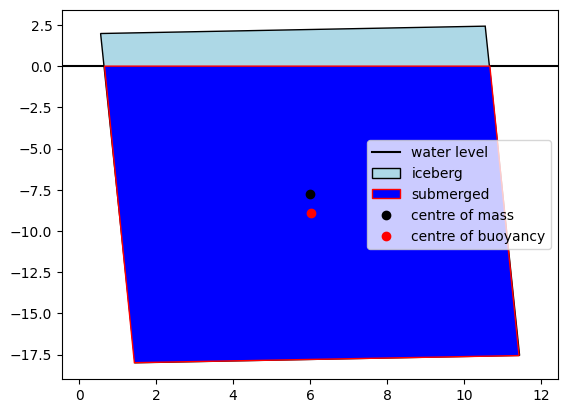

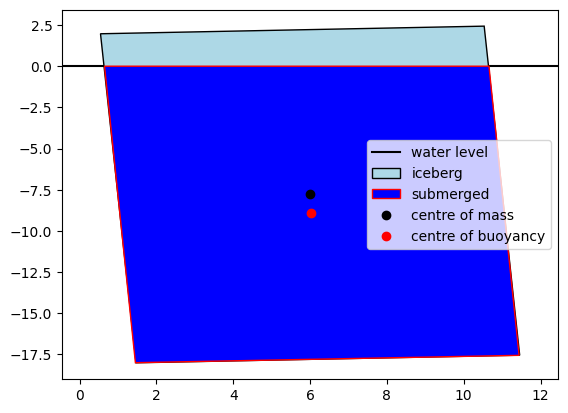

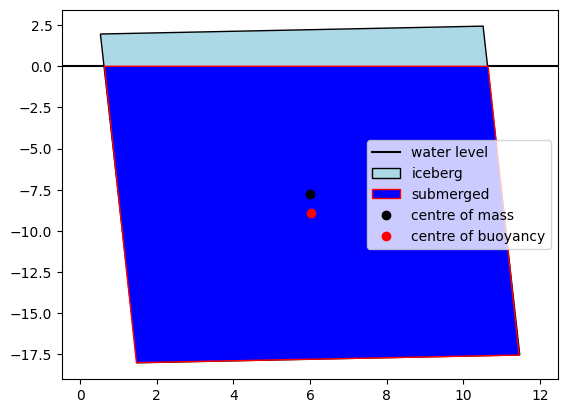

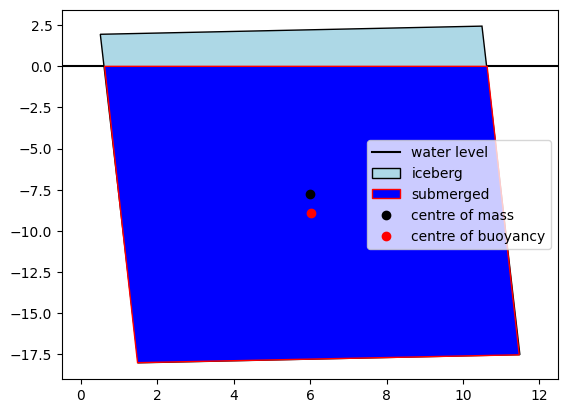

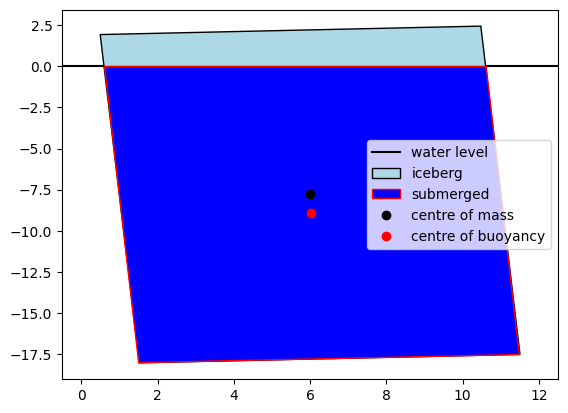

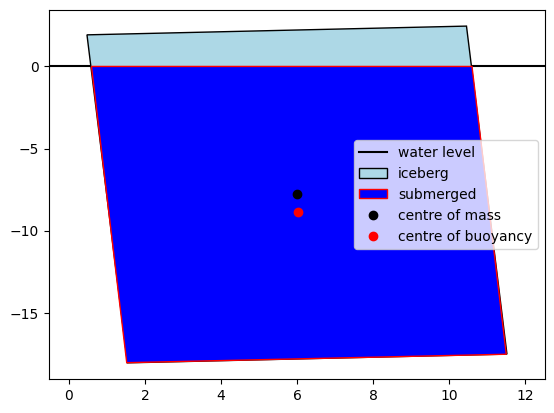

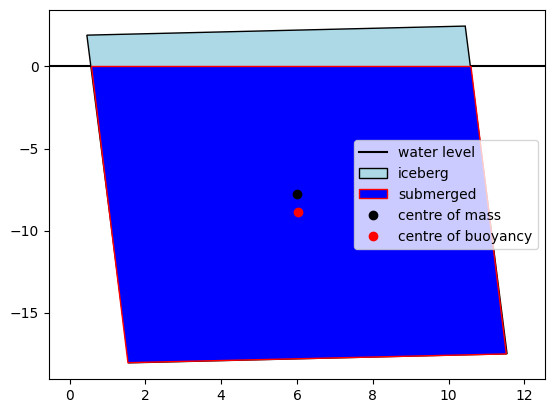

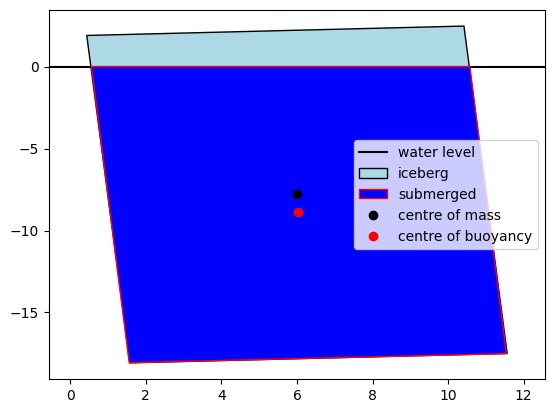

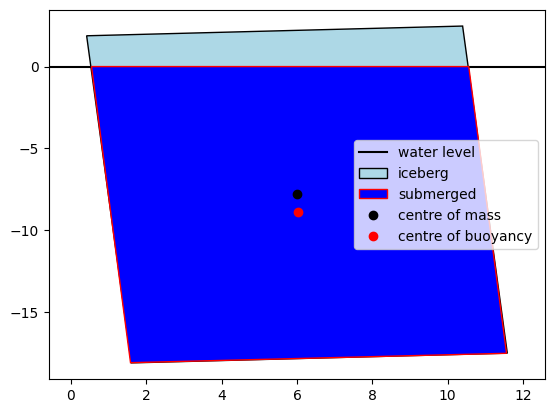

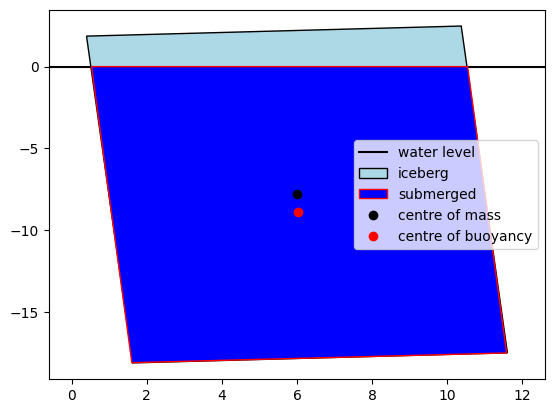

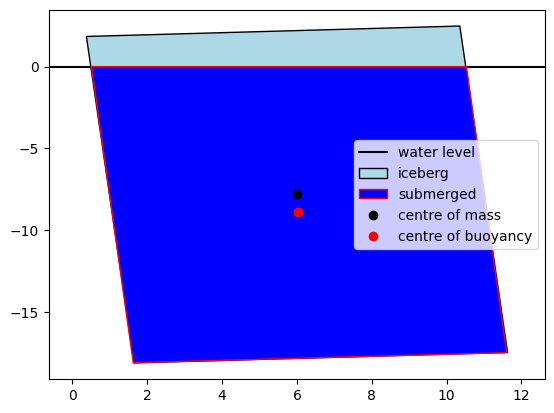

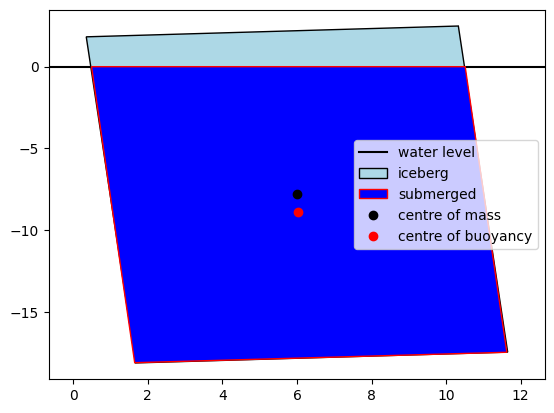

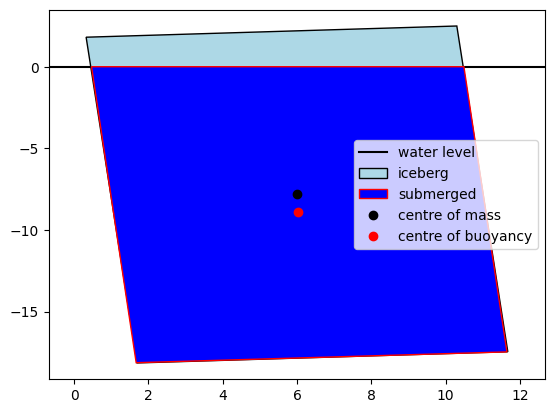

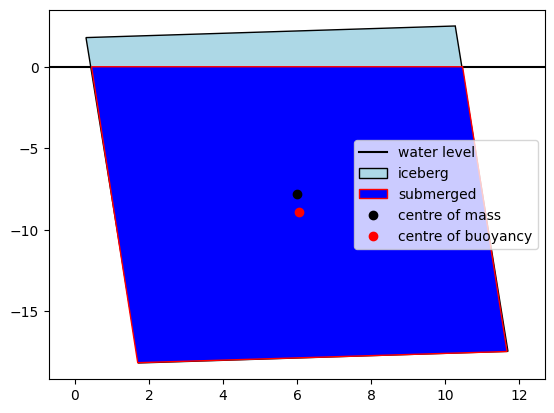

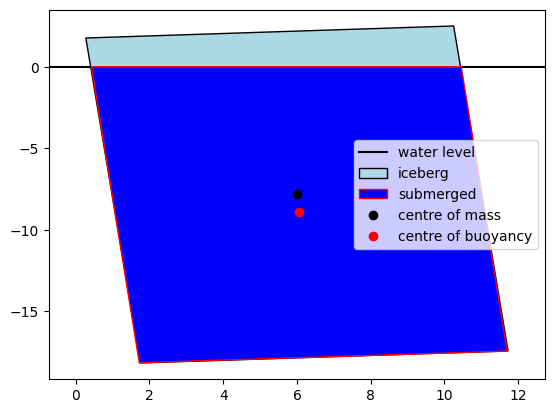

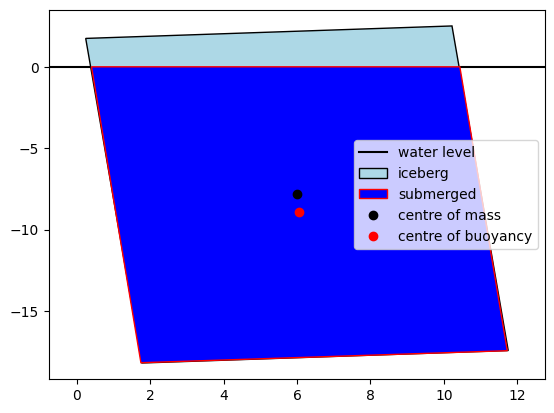

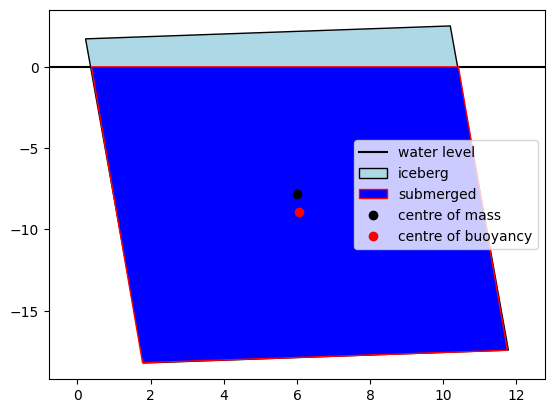

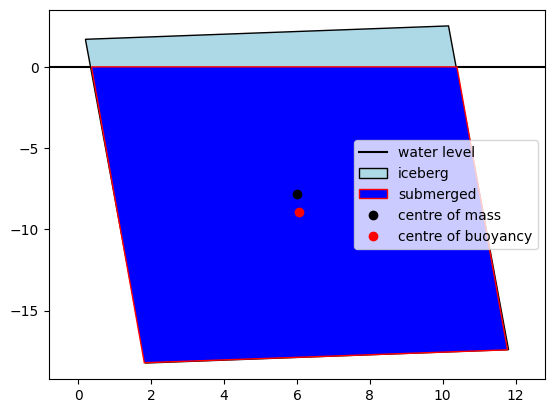

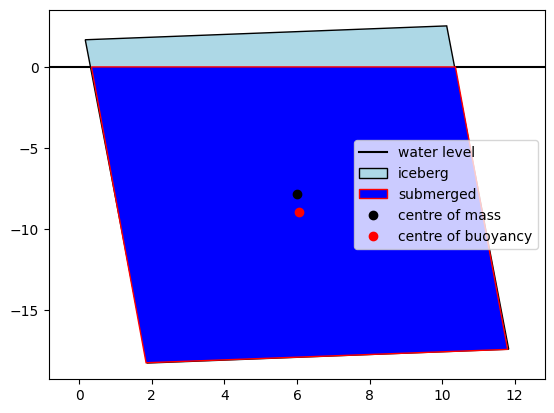

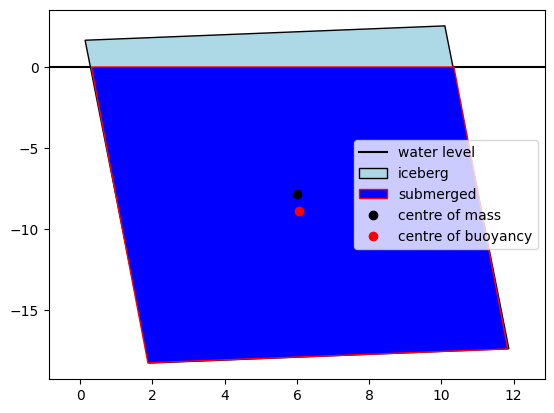

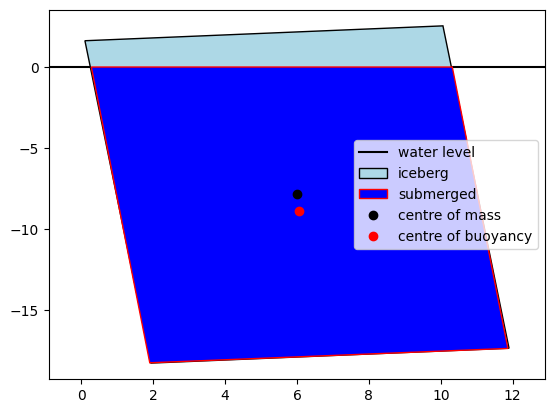

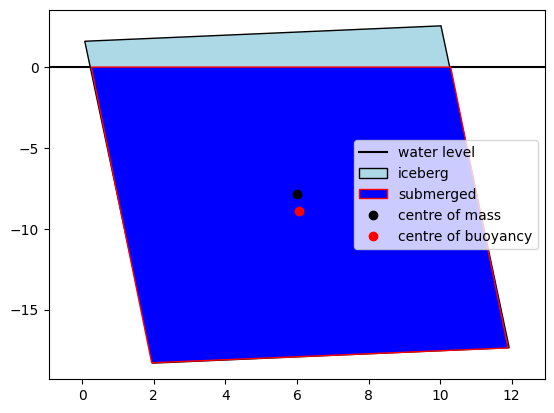

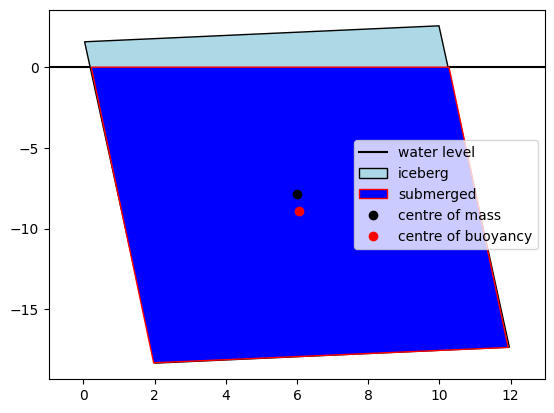

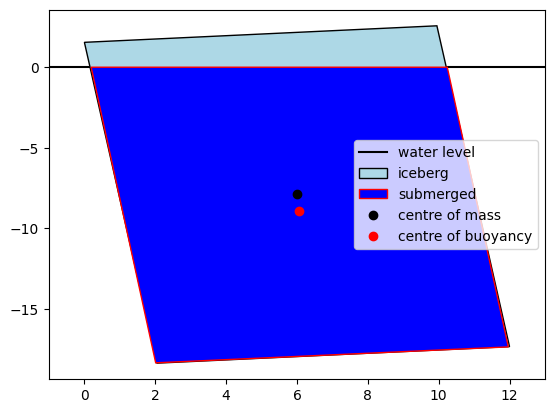

AttributeError: 'DynamicsSolver' object has no attribute 'x'

In [7]:
n_timesteps = 100
solver.simulate(berg, n_timesteps, plot=True)